In [23]:
import pandas as pd

In [24]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
#download the dataset
data.to_csv('wine_quality.csv')

In [27]:
#value count of quality column
data['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [29]:
def quality_to_category(quality):
    if quality <= 3:
        return 0  #l
    elif 4 <= quality <= 6:
        return 1  #m
    else:
        return 2  #h


In [30]:
data['quality_category'] = data['quality'].apply(quality_to_category)

#drop the original quality column
data = data.drop('quality', axis=1)

#split features and target
X = data.drop('quality_category', axis=1)
y = data['quality_category']


In [31]:
#normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#encode the target labels
y_encoded = to_categorical(y)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y)


In [32]:
#build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: low, medium, high
])

#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [34]:
#train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

#evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'testaccuracy: {accuracy:.2f}')


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7518 - loss: 0.7351 - val_accuracy: 0.8189 - val_loss: 0.4546
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7947 - loss: 0.4611 - val_accuracy: 0.8202 - val_loss: 0.4333
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 0.4166 - val_accuracy: 0.8189 - val_loss: 0.4221
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8077 - loss: 0.4159 - val_accuracy: 0.8125 - val_loss: 0.4229
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8168 - loss: 0.3856 - val_accuracy: 0.8329 - val_loss: 0.4188
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8221 - loss: 0.3984 - val_accuracy: 0.8163 - val_loss: 0.4203
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.3702 - val_accuracy: 0.8227 - val_loss: 0.4155
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.3979 - val_accuracy: 0.8176 - val_loss

In [39]:
#predict and evaluate metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

#calculate and print metrics with zero_division handling
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


accuracy: 0.84
precision: 0.82
recall: 0.84
F1 Score: 0.83


In [42]:
report = classification_report(y_test_classes, y_pred_classes, target_names=['Low', 'Medium', 'High'], zero_division=0)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         4
      Medium       0.87      0.94      0.90       764
        High       0.69      0.49      0.57       212

    accuracy                           0.84       980
   macro avg       0.52      0.48      0.49       980
weighted avg       0.82      0.84      0.83       980



In [44]:
# Function to train a model with given hyperparameters
def train_model(X_train, y_train, X_test, y_test,
                neurons=[64, 32, 16],
                activation='relu',
                optimizer='adam',
                epochs=50,
                batch_size=32):
    # Build the model
    model = Sequential()
    model.add(Dense(neurons[0], activation=activation, input_shape=(X_train.shape[1],)))
    for n in neurons[1:]:
        model.add(Dense(n, activation=activation))
    model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1


In [45]:
# List of hyperparameter configurations
hyperparameter_configs = [
    {'neurons': [64, 32, 16], 'activation': 'relu', 'optimizer': 'adam', 'epochs': 50, 'batch_size': 32},
    {'neurons': [128, 64, 32], 'activation': 'relu', 'optimizer': 'adam', 'epochs': 50, 'batch_size': 32},
    {'neurons': [64, 32, 16], 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 50, 'batch_size': 32},
    {'neurons': [64, 32, 16], 'activation': 'relu', 'optimizer': 'sgd', 'epochs': 50, 'batch_size': 32},
    {'neurons': [64, 32, 16], 'activation': 'relu', 'optimizer': 'adam', 'epochs': 100, 'batch_size': 32},
    {'neurons': [64, 32, 16], 'activation': 'relu', 'optimizer': 'adam', 'epochs': 50, 'batch_size': 64},
]

# Train models with different configurations
results = []
for config in hyperparameter_configs:
    print(f"Training with config: {config}")
    acc, prec, rec, f1 = train_model(
        X_train, y_train, X_test, y_test,
        neurons=config['neurons'],
        activation=config['activation'],
        optimizer=config['optimizer'],
        epochs=config['epochs'],
        batch_size=config['batch_size']
    )
    results.append({
        'Neurons': config['neurons'],
        'Activation': config['activation'],
        'Optimizer': config['optimizer'],
        'Epochs': config['epochs'],
        'Batch Size': config['batch_size'],
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print("\nHyperparameter Tuning Results:")
print(results_df)

# Save results to a CSV file
results_df.to_csv('hyperparameter_tuning_results.csv', index=False)


Training with config: {'neurons': [64, 32, 16], 'activation': 'relu', 'optimizer': 'adam', 'epochs': 50, 'batch_size': 32}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training with config: {'neurons': [128, 64, 32], 'activation': 'relu', 'optimizer': 'adam', 'epochs': 50, 'batch_size': 32}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Training with config: {'neurons': [64, 32, 16], 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 50, 'batch_size': 32}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Training with config: {'neurons': [64, 32, 16], 'activation': 'relu', 'optimizer': 'sgd', 'epochs': 50, 'batch_size': 32}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training with config: {'neurons': [64, 32, 16], 'activation': 'relu', 'optimizer': 'adam', 'epochs': 100, 'batch_size': 32}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Training with config: {'neurons': [64, 32, 16], 'activation': 'relu', 'optimizer': 'adam', 'epochs': 50, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Hyperparameter Tuning Results:
         Neurons Activation Optimizer  Epochs  Batch Size  Accuracy  Precision    Recall  F1 Score
0   [64, 32, 16]       relu      adam      50          32  0.829592   0.821110  0.829592  0.824913
1  [128, 64, 32]       relu      adam      50          32  0.836735   0.835635  0.836735  0.836155
2   [64, 32, 16]       tanh      adam      50          32  0.840816   0.828456  0.840816  0.832220
3   [64, 32, 16]       relu       sgd      50          32  0.822449   0.805884  0.822449  0.810125
4   [64, 32, 16]       relu      adam     100          32  0.794898   0.805459  0.794898  0.798919
5   [64, 32, 16]       relu      adam      50          64  0.829592   0.821582  0.829592  0.825232


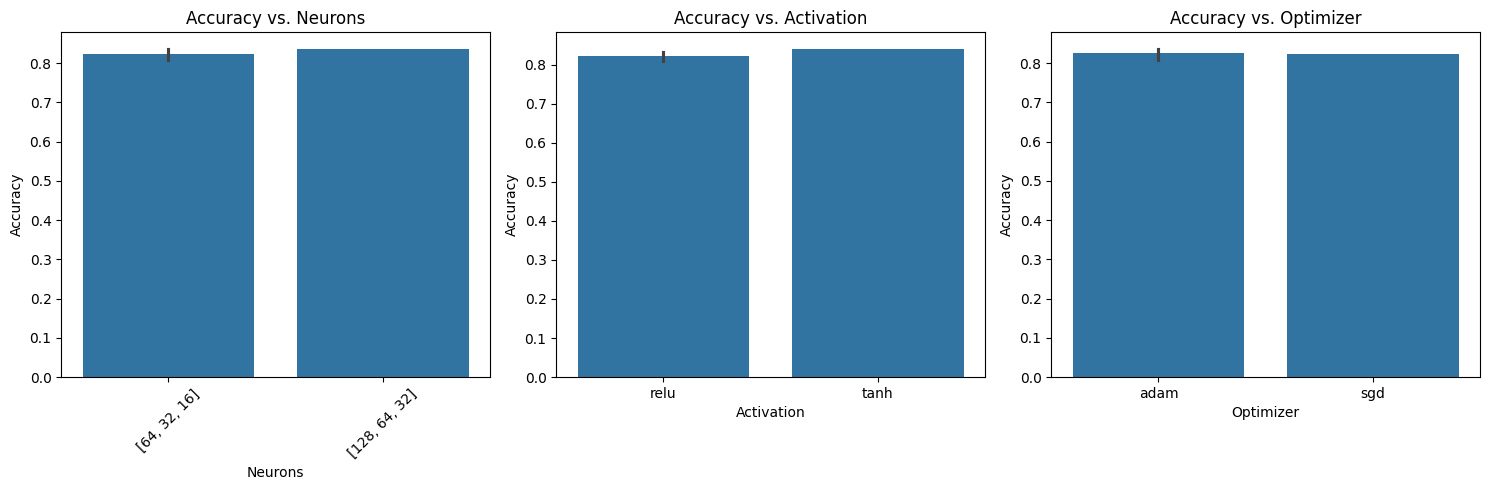

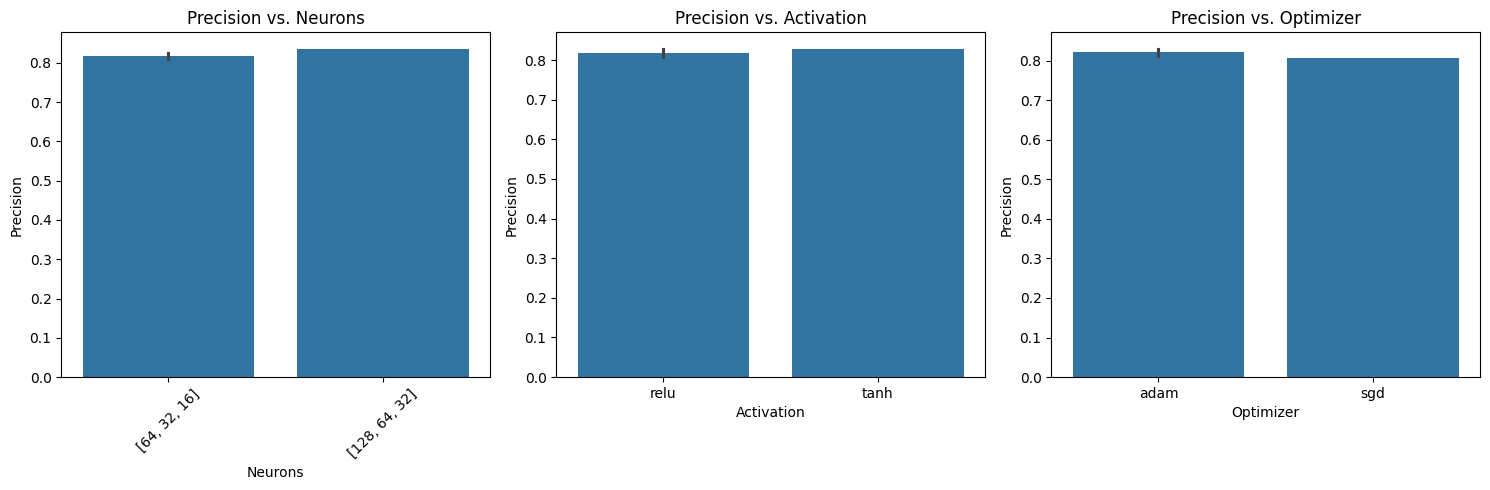

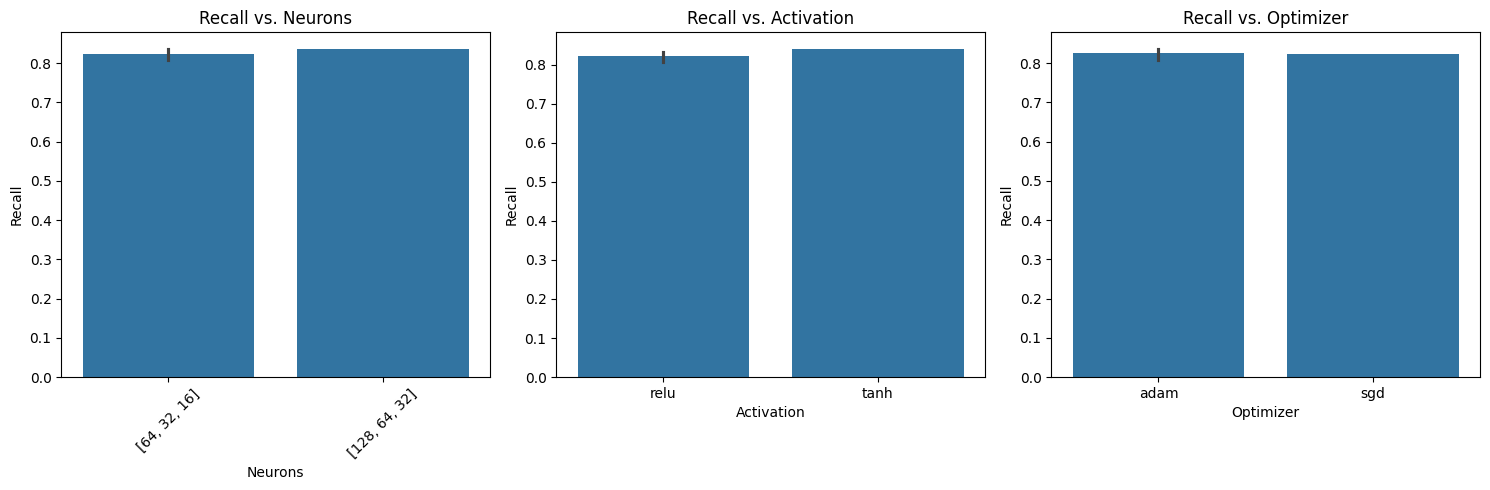

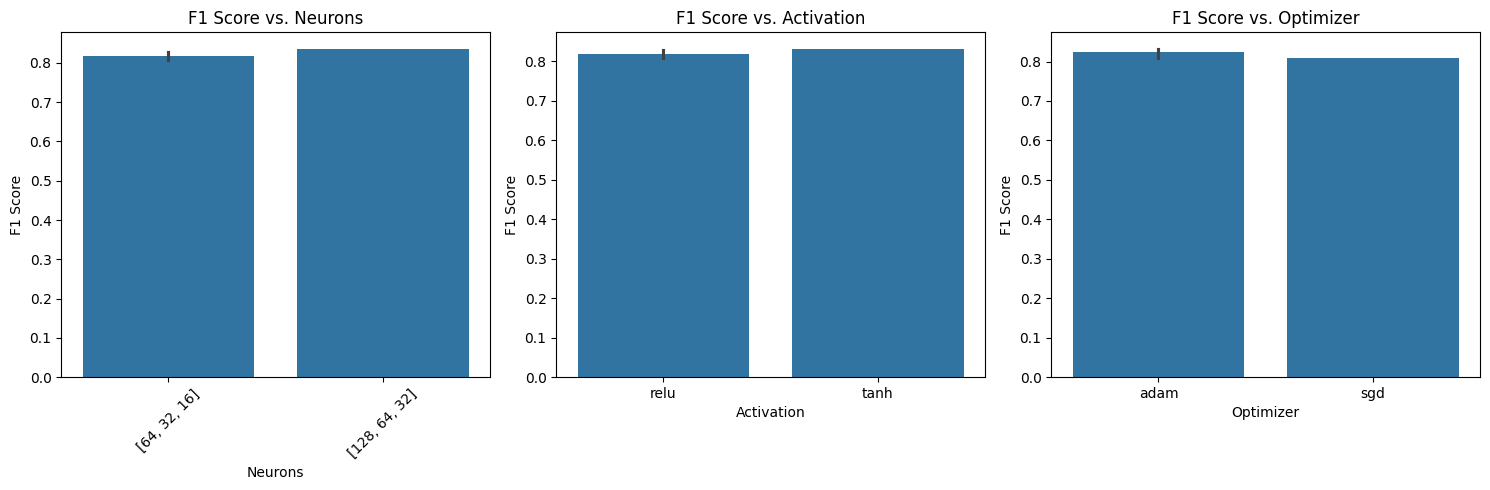

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results from the CSV file
results_df = pd.read_csv('hyperparameter_tuning_results.csv')

results_df['Neurons'] = results_df['Neurons'].astype(str)

# Plotting Accuracy vs. different hyperparameters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Neurons', y='Accuracy', data=results_df)
plt.title('Accuracy vs. Neurons')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Activation', y='Accuracy', data=results_df)
plt.title('Accuracy vs. Activation')

plt.subplot(1, 3, 3)
sns.barplot(x='Optimizer', y='Accuracy', data=results_df)
plt.title('Accuracy vs. Optimizer')


plt.tight_layout()
plt.show()

# Plotting other metrics (Precision, Recall, F1 Score) similarly
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Neurons', y='Precision', data=results_df)
plt.title('Precision vs. Neurons')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Activation', y='Precision', data=results_df)
plt.title('Precision vs. Activation')

plt.subplot(1, 3, 3)
sns.barplot(x='Optimizer', y='Precision', data=results_df)
plt.title('Precision vs. Optimizer')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Neurons', y='Recall', data=results_df)
plt.title('Recall vs. Neurons')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Activation', y='Recall', data=results_df)
plt.title('Recall vs. Activation')

plt.subplot(1, 3, 3)
sns.barplot(x='Optimizer', y='Recall', data=results_df)
plt.title('Recall vs. Optimizer')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Neurons', y='F1 Score', data=results_df)
plt.title('F1 Score vs. Neurons')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Activation', y='F1 Score', data=results_df)
plt.title('F1 Score vs. Activation')

plt.subplot(1, 3, 3)
sns.barplot(x='Optimizer', y='F1 Score', data=results_df)
plt.title('F1 Score vs. Optimizer')

plt.tight_layout()
plt.show()